c:\Users\admin\OneDrive - GENES\ENSAE\Python-Data-2A-ENSAE\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading original data...
Reading 10 images (random selection)...
Reading 5 images (random selection)...
Displaying 10 training images and 5 test images


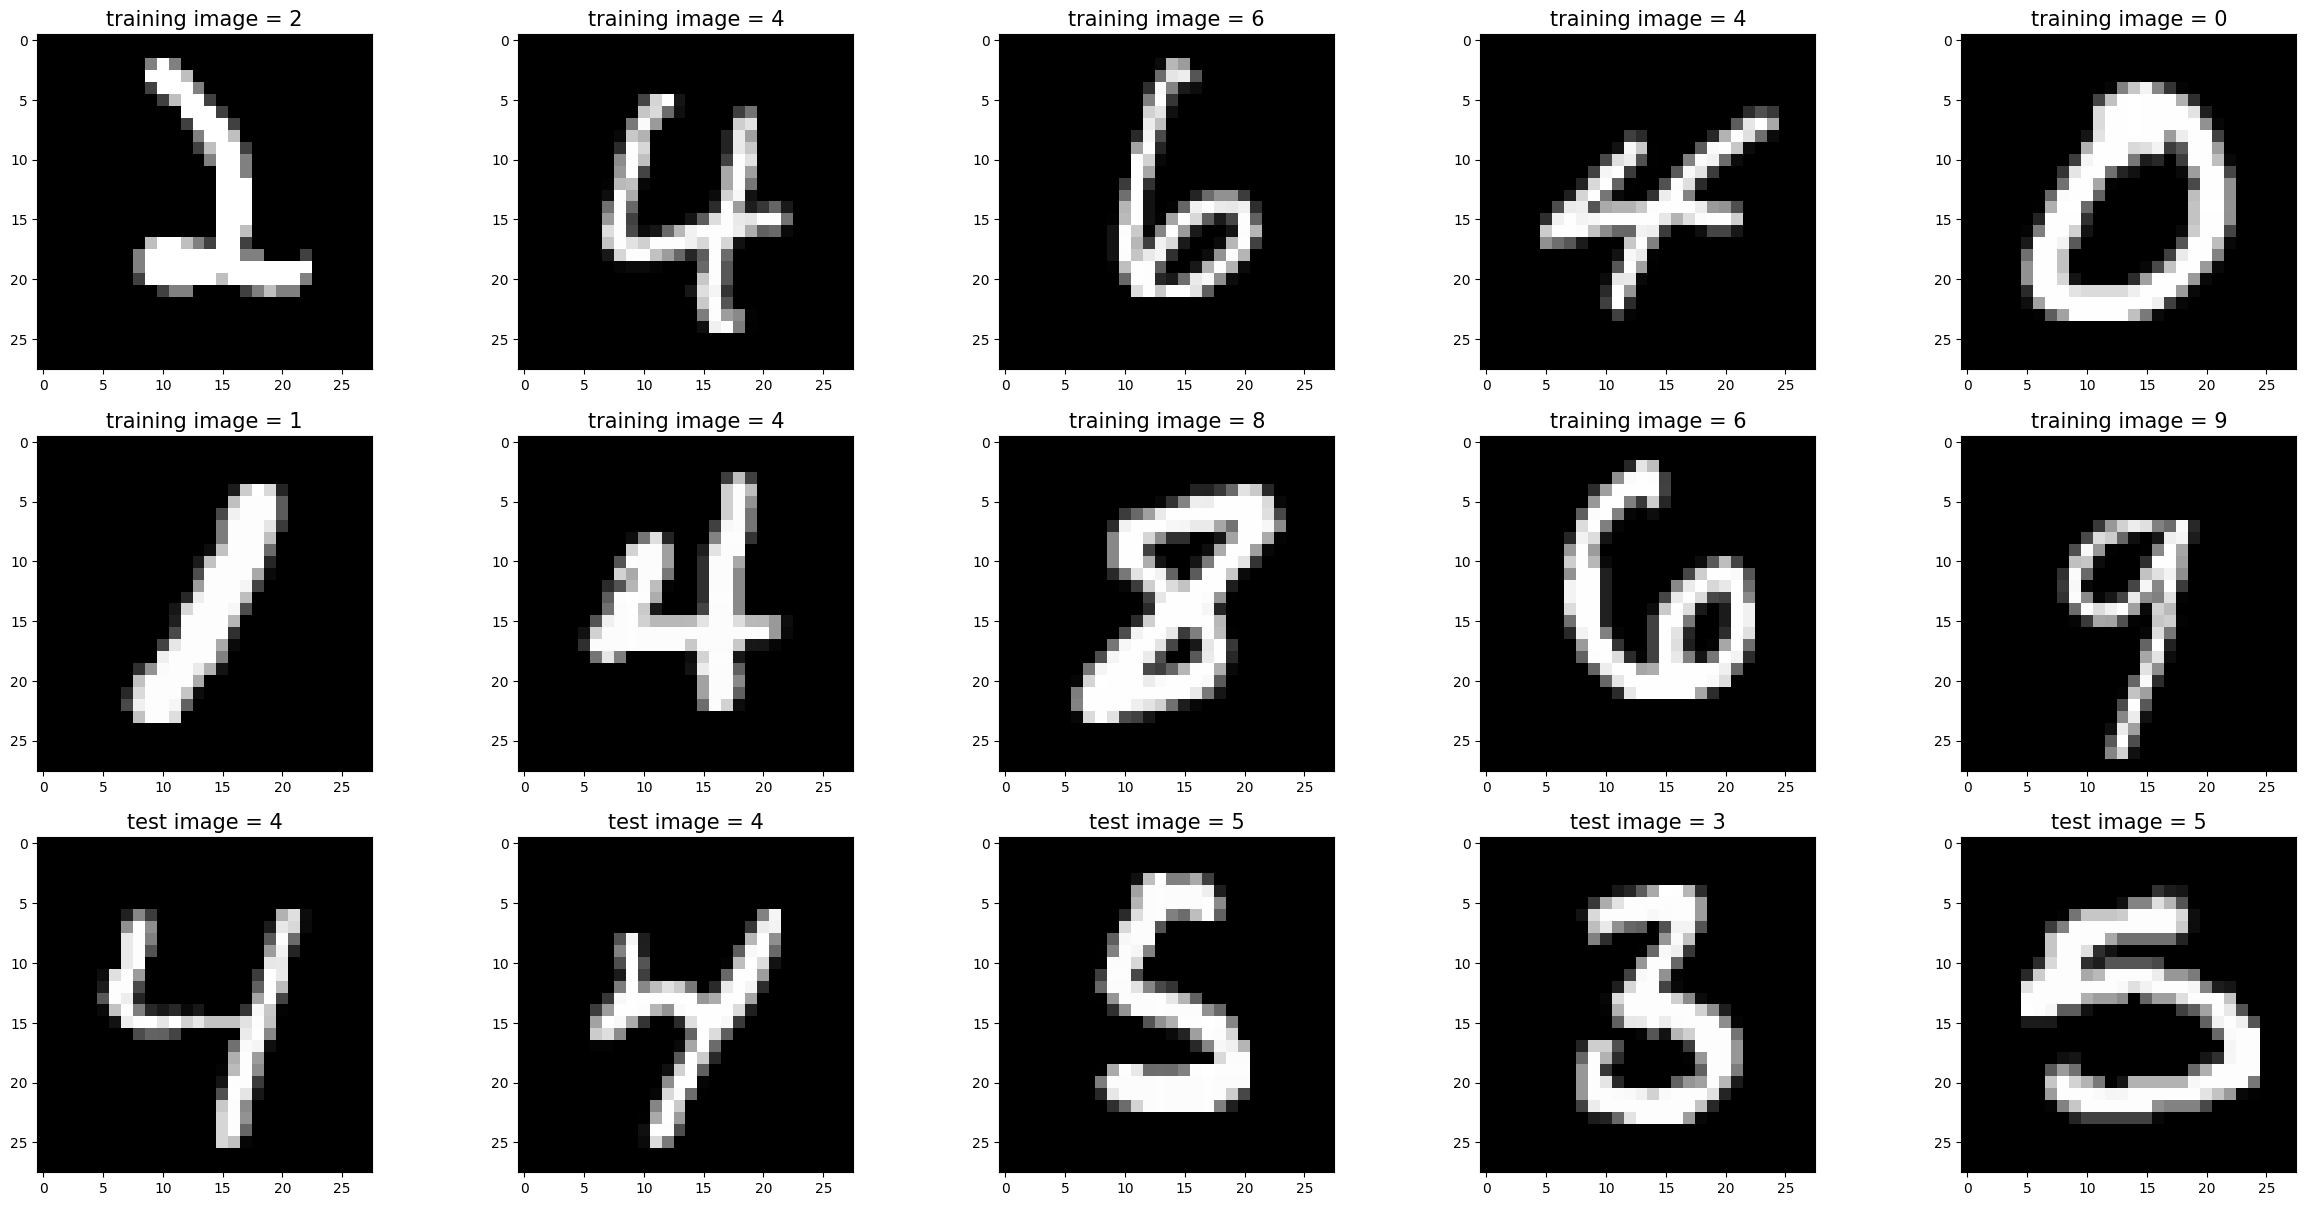

In [6]:
#MNIST importation 
from MNIST import MnistDataloader

mnist = MnistDataloader(data_dir="..\\data\\MNIST")
mnist.download_mnist()
mnist.show_images(show_noisy=False, seed=21)

In [35]:
#API call function

import requests



def ocr_space_file(filename, overlay=False, api_key='helloworld', language = 'eng', filetype = 'PNG', OCREngine = 2):
    """ OCR.space API request with local file.
        Python3.5 - not tested on 2.7
    :param filename: Your file path & name.
    :param overlay: Is OCR.space overlay required in your response.
                    Defaults to False.
    :param api_key: OCR.space API key.
                    Defaults to 'helloworld'.
    :param language: Language code to be used in OCR.
                    List of available language codes can be found on https://ocr.space/OCRAPI
                    Defaults to 'en'.
    :return: Result in JSON format.
    """

    payload = {'isOverlayRequired': overlay,
               'apikey': api_key,
               'language': language,
               'filetype': filetype,
               'OCREngine': OCREngine,
            #    'Scale': True
               }
    with open(filename, 'rb') as f:
        r = requests.post('https://api.ocr.space/parse/image',
                          files={filename: f},
                          data=payload, 
                          )
    return r.content.decode()




In [36]:
#API key retrieval
import os
from dotenv import load_dotenv


load_dotenv(dotenv_path=".env") 


api_key = os.getenv("OCR_API_KEY")

Loading 3 training images (sequential)...
Loading 0 test images (sequential)...
CAPTCHA dataset loaded successfully!
Applying gaussian noise (grayscale mode) to CAPTCHA images (factor: 0.1)...
Predicting images
{'ParsedResults': [{'TextOverlay': {'Lines': [], 'HasOverlay': False, 'Message': 'Text overlay is not provided as it is not requested'}, 'TextOrientation': '0', 'FileParseExitCode': 1, 'ParsedText': '45g6', 'ErrorMessage': '', 'ErrorDetails': ''}], 'OCRExitCode': 1, 'IsErroredOnProcessing': False, 'ProcessingTimeInMilliseconds': '640', 'SearchablePDFURL': 'Searchable PDF not generated as it was not requested.'}
0 45g6
Predicting images
{'ParsedResults': [{'TextOverlay': {'Lines': [], 'HasOverlay': False, 'Message': 'Text overlay is not provided as it is not requested'}, 'TextOrientation': '0', 'FileParseExitCode': 1, 'ParsedText': '', 'ErrorMessage': '', 'ErrorDetails': ''}], 'OCRExitCode': 1, 'IsErroredOnProcessing': False, 'ProcessingTimeInMilliseconds': '625', 'SearchablePDFU

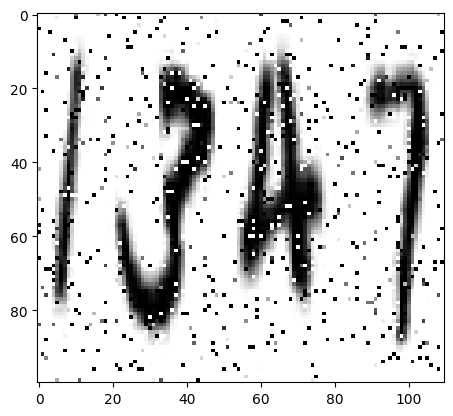

In [37]:
import json
import numpy as np
from PIL import Image, ImageOps, ImageFilter
import matplotlib.pyplot as plt

#CAPTCHA generation

import os
h5_filepath = os.path.join('..', 'data', 'captcha_data', 'captcha_dataset.h5')
x = mnist.load_captcha_dataset( h5_filepath=h5_filepath, num_images_train=3, num_images_test=0, random_selection=False, 
                               apply_noise=True , noise_type='gaussian', noise_factor=0.1, rgb_noise=False)

(X_train, y_train), (X_test, y_test) = x

#API testing on X_train images

for i in range(len(X_train)):
    
    image_data = X_train[i]


    # If the data consists of floating-point numbers between 0 and 1, they are converted to 255.
    if image_data.max() <= 1.0:
        image_data = (image_data * 255).astype(np.uint8)
    else:
        image_data = image_data.astype(np.uint8)

    # Image creation and saving
    img = Image.fromarray(image_data)
    # Convert to grayscale if not already
    if img.mode != 'L':
        img = img.convert('L')
    # Invert the image colors
    img = ImageOps.invert(img)
    # Enhance image sharpness
    img = img.filter(ImageFilter.SHARPEN)
    img.save("test1.png")
    print("Predicting images")
    test_file = ocr_space_file(filename='test1.png', api_key=api_key, language='eng', filetype='PNG', OCREngine=2)
    
    
    # Converting the result string into a dictionary
    data = json.loads(test_file)
    print(data)
    # Access to the parsed text
    parsed_text = data["ParsedResults"][0]["ParsedText"]

    print(i,parsed_text)
    plt.imshow(img, cmap='gray')